# 1. Important Libraries and Functions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
Banknotes = pd.read_csv('Banknote_Project')
from sklearn.preprocessing import MinMaxScaler

# 2. Statistical Operations on the Data
and dasic scatterplot

Mean V1         0.433735
V2         1.922353
New_Col    0.436589
dtype: float64
Var V1          8.075409
V2         34.420603
New_Col     0.245979
dtype: float64
Dev V1         2.841726
V2         5.866907
New_Col    0.495963
dtype: float64


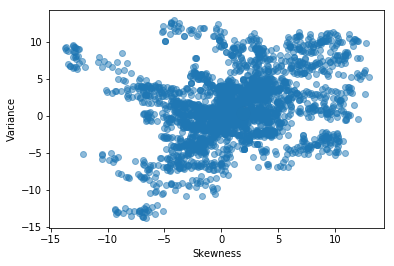

In [51]:
V1 = Banknotes.sort_values('V1')
V2 = Banknotes.sort_values('V2')
mean_bn = np.mean(Banknotes)
Var_bn = np.var(Banknotes)
deviation_bn = np.std(Banknotes)
print('Mean', mean_bn)
print('Var',Var_bn)
print('Dev',deviation_bn)
plt.xlabel('Skewness')
plt.ylabel('Variance')
plt.scatter(mean_bn['V2'],mean_bn['V1'], color = 'red', alpha = 0.45, s = 200)
plt.scatter(V2, V1, alpha = 0.5)

Larger Blue Points Implies high Variances and Larger Orange Points Implies high Skewness


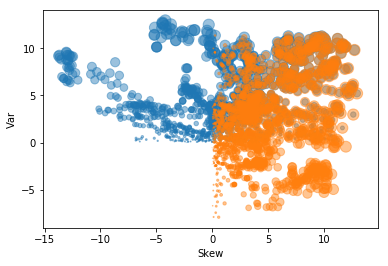

In [3]:
V1 = Banknotes.sort_values('V1')
V2 = Banknotes.sort_values('V2')
mean_bn = np.mean(Banknotes)
Var_bn = np.var(Banknotes)
deviation_bn = np.std(Banknotes)
plt.xlabel('Skew')
plt.ylabel('Var')
print('Larger Blue Points Implies high Variances and Larger Orange Points Implies high Skewness')
plt.scatter(V2,V1, s=V1*10, alpha=0.45)
plt.scatter(V2,V1, s=V2*10, alpha=0.45)


# 3. Sorting and Filtering the Dataset

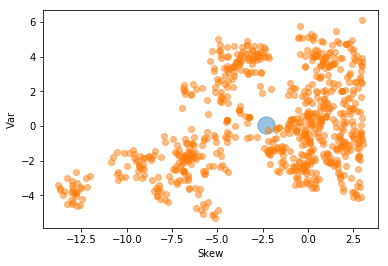

In [4]:
#Where Skewness is less than 3
Banknotes.sort_values('V2', inplace = True)
Cluster_A = Banknotes[ Banknotes['V2'] <= 3]
Cluster_A
mean_A = np.mean(Cluster_A)
plt.xlabel('Skew')
plt.ylabel('Var')
plt.scatter(mean_A['V2'],mean_A['V1'], s = 300, alpha = 0.45)
plt.scatter(Cluster_A['V2'], Cluster_A['V1'], alpha = 0.5)

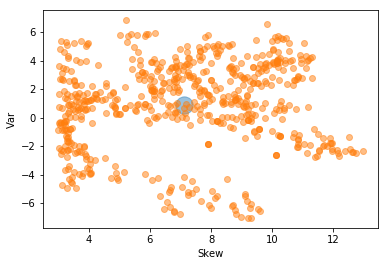

In [5]:
#Where Skewness is greater than or equal to 3
Banknotes.sort_values('V2', inplace = True)
Cluster_B = Banknotes[ Banknotes['V2'] > 3]
mean_B = np.mean(Cluster_B)
plt.xlabel('Skew')
plt.ylabel('Var')
plt.scatter(mean_B['V2'],mean_B['V1'], s = 300, alpha = 0.45)
plt.scatter(Cluster_B['V2'], Cluster_B['V1'], alpha=0.5)

In [6]:
V1_Max=V1.iloc[1]
V1_Min=V1.iloc[-1]
V2_Max=V2.iloc[1]
V2_Min=V2.iloc[-1]
print('V1',[V1_Max, V1_Min],'V2', [V2_Max, V2_Min])
print('V1 minimum value is -7.0364, V1 Maximum value is 6.8248')
print('V2 minimum value is -13.6779, V1 Maximum value is 12.9516')

V1 [V1   -7.0364
V2    9.2931
Name: 1294, dtype: float64, V1    6.8248
V2    5.2187
Name: 634, dtype: float64] V2 [V1    -3.6961
V2   -13.6779
Name: 1064, dtype: float64, V1    -2.3430
V2    12.9516
Name: 126, dtype: float64]
V1 minimum value is -7.0364, V1 Maximum value is 6.8248
V2 minimum value is -13.6779, V1 Maximum value is 12.9516


# 4. Normalizing the Dataset
and the basic scatterplot

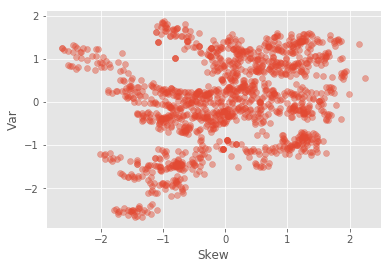

In [65]:
Banknote_normed = (Banknotes-mean_bn)/deviation_bn
Banknote_normed.sort_values('V2', inplace = True)
Banknote_normed.sort_values('V1', inplace = True)
Va = Banknote_normed.sort_values('V2', inplace = True)
Vb = Banknote_normed.sort_values('V1', inplace = True)
plt.xlabel('Skew')
plt.ylabel('Var')
plt.scatter(Banknote_normed['V1'],Banknote_normed['V2'], alpha=0.45)
#Banknote_normed



In [85]:
Va = Banknote_normed.sort_values('V2')
Vb = Banknote_normed.sort_values('V1')

# 5. KMeans Algorithm
algorithms and scatter plot (with 2 clusters)

In [19]:
from sklearn.cluster import KMeans
B_notes = np.column_stack((V1,V2))
B_notes
kmean_result = KMeans(n_clusters=2).fit(B_notes)

V1         0.433735
V2         1.922353
New_Col    0.436589
dtype: float64

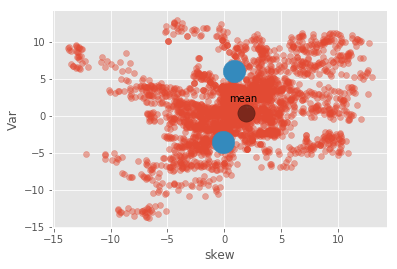

In [85]:
kmean_result.cluster_centers_
clusters = kmean_result.cluster_centers_
plt.scatter(V2,V1, alpha = 0.45)
plt.xlabel('skew')
plt.ylabel('Var')
plt.scatter(mean_bn['V2'],mean_bn['V1'], alpha = 0.45, color = "black", s = 300)
plt.text(0.433735, 1.922353, "mean")
plt.scatter(clusters[:,0], clusters[:,1], s = 500)
mean_bn

# 6. Improving Visualizations
and adding Labels

In [75]:
y_predicted = kmean_result.fit_predict(Banknotes[['V1','V2']])
y_predicted
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline


Text(-0.123767,-3.45591,'cluster_2')

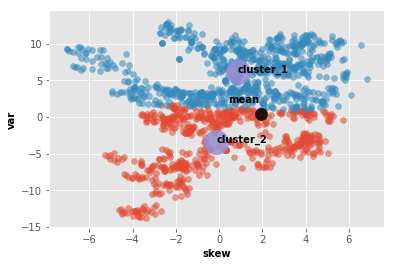

In [97]:
Banknotes['New_Col'] = y_predicted
Banknotes.head()
DF1 = Banknotes[Banknotes.New_Col==0]
DF2 = Banknotes[Banknotes.New_Col==1]
plt.xlabel('skew', size='medium', color='black', weight='semibold')
plt.ylabel('var', size='medium', color='black', weight='semibold')
plt.scatter(DF1.V1,DF1['V2'], alpha = 0.55)
plt.scatter(DF2.V1,DF2['V2'], alpha = 0.55)
plt.scatter(clusters[:,0], clusters[:,1], alpha = 0.85, s = 600)
plt.scatter(mean_bn['V2'],mean_bn['V1'], color = "black", s = 150, alpha = 0.85)
plt.text(0.433735, 1.922353, "mean", size='medium', color='black', weight='semibold')
plt.text(0.86960048,  6.12717909, 'cluster_1', size='medium', color='black', weight='semibold')
plt.text(-0.12376677, -3.45591265, 'cluster_2', size='medium', color='black', weight='semibold')
##please note you havent added the labels


# 7. Generating Cluster Centers and Elbow Plot

In [100]:
clusters = kmean_result.cluster_centers_
clusters
#In this case the term "clusters" represent the cluster centers



array([[-0.12376677, -3.45591265],
       [ 0.86960048,  6.12717909]])

In [101]:
scaler = MinMaxScaler()
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(Banknotes[['V1','V2']])
    sse.append(km.inertia_)
sse

[58304.52906491891,
 26942.89696158752,
 16618.34505259317,
 12797.58005614487,
 9958.270547538457,
 7620.370834154025,
 6572.076734848895,
 5670.234928027174,
 4871.788659930775]

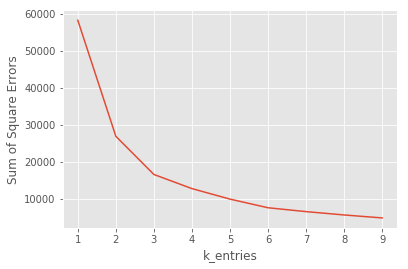

In [102]:
fig,ax= plt.subplots()
ax.plot(k_rng,sse)
plt.xlabel('k_entries')
plt.ylabel('Sum of Square Errors')
plt.show()

In [99]:
print("Exit Project")

Exit Project
